In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.declarative import declarative_base


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# Declare a Base using `automap_base()` / reflect an existing database into a new model 
# or use Base = declarative_base()
# Connecting the file to the engine 
Base = automap_base()

# Use the Base class to reflect the database tables/ reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
# Base.classes.keys()

# Alternative method is using inspector, it will print the same result
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Displaying the class names a.k.a column name from the table 
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
# Assign the 'measurement' class & 'station' class to a variable called `Measurement` & `Station`
# Assigning 2 tables to these 2 variables 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# showing the first row information 
# first_row = session.query(Measurement).first()
# first_row.__dict__

# first_row = session.query(Station).first()
# first_row.__dict__

In [11]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
# print(columns)
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
# print(columns)
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Get the datframe for the measurement table by using .fetchall() syntax
measurement_df = engine.execute("SELECT * FROM measurement;").fetchall()
measurement_df

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [14]:
# Get the datframe for the station table 
stations_df = engine.execute("SELECT * FROM station;").fetchall()
stations_df

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
# query the measurement date and prcp, order it by descending to see the latest data.
# Perform a query to retrieve the data and precipitation scores - the Measurement.date, & Measurement.prcp syntax
# we need all the data after 2016-08-23 
all_results = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc())\
            .filter(Measurement.date>'2016-08-23').all()
all_results
                                          

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [16]:

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.read_sql('SELECT date, prcp FROM Measurement', conn)
# date_prcp_df

# Sort the dataframe by date
date_prcp_df = pd.read_sql('SELECT date, prcp FROM Measurement ORDER BY Date DESC', conn)
date_prcp_df.head()


,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [17]:
# Sort the dataframe by date
date_prcp_df = date_prcp_df.loc[date_prcp_df['date']>'2016-08-23']
date_prcp_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2218,2016-08-24,2.28
2219,2016-08-24,NaN
2220,2016-08-24,1.22
2221,2016-08-24,2.15


In [18]:
# we need to sort it to ascending order after we filter it.
date_prcp_df = date_prcp_df.sort_values(by = 'date')
date_prcp_df 


,date,prcp
2222,2016-08-24,1.45
2216,2016-08-24,0.08
2217,2016-08-24,2.15
2221,2016-08-24,2.15
2219,2016-08-24,NaN
...,...,...
4,2017-08-22,0.00
3,2017-08-23,0.45
2,2017-08-23,0.08
1,2017-08-23,0.00


/Users/AliciaLy/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Precipation by Date for the Last 1 year')

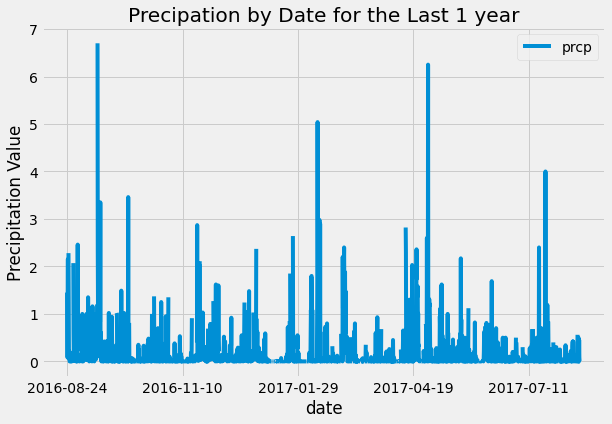

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
# plt.plot is panda plotting function
# we can use dataframe.plot when we already have the dataframe
date_prcp_df.plot(x='date',y='prcp',figsize=(9,6))
plt.ylabel('Precipitation Value')
plt.title('Precipation by Date for the Last 1 year')


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_prcp = date_prcp_df.describe()
summary_prcp 

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
# 9 stations
stations_df = session.query(Station.station).count()
stations_df

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# we are extracting the station from Measurement table, and the count of the station, grouping them by station 
most_rows = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
            .order_by(func.count(Measurement.station).desc())

for row in most_rows:
    print(row)
# we have the station and the count, now we need to make it descending order.


# List the stations and the counts in descending order.
# before
# most_rows = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)
# after
#most_rows = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
#             .order_by(func.count(Measurement.station).desc())

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# func.min(Measurement.tobs) - lowest temperature 
# highest temperature recorded, and average temperature of the most active station?
# func.max(Measurement.tobs) - highest temperature 
# func.avg(Measurement.tobs) - average temperature 
# USC00519281 is the busiest station

temp_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Measurement.station=='USC00519281')

for temp in temp_station:
    print(temp)



(54.0, 85.0, 71.66378066378067)


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_month = session.query(Measurement.tobs).order_by(Measurement.tobs.asc()).filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>'2016-08-23').all()


# for station in station_month:
#     print(station)

# Creating a list because we only had a tuple result
tobs = [row[0] for row in station_month]
tobs


[59.0,
 59.0,
 59.0,
 60.0,
 60.0,
 61.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 63.0,
 63.0,
 63.0,
 63.0,
 64.0,
 64.0,
 64.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 73.0,
 73.0,
 73.0,
 73.0,

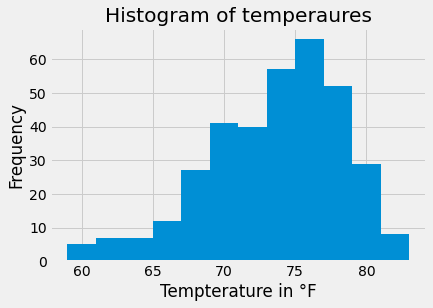

In [34]:
plt.hist(tobs, bins=12, rwidth=1.0)
plt.title("Histogram of temperaures")
plt.xlabel("Tempterature in °F")
plt.ylabel("Frequency")
plt.show()